### Callin Switzer
###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy import signal
import itertools as it
import sys
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import scipy.io
import glob
import itertools

# Neural net libs
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")
print("last run on " + str(datetime.now()))

Using TensorFlow backend.


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-05-10 15:38:28.599267


In [2]:
# data directory
dataDir = r"D:/Dropbox/AcademiaDropbox/dataAnalysisForOthers\MothMuscleLength\Data"

# figure directory
figDir = r"D:\Dropbox\/AcademiaDropbox/dataAnalysisForOthers\MothMuscleLength\Figures" 
if not os.path.exists(figDir):
    os.makedirs(figDir)
    
# data output
dataOut = r"D:\Dropbox\/AcademiaDropbox/dataAnalysisForOthers\MothMuscleLength\DataOut" 
if not os.path.exists(dataOut):
    os.makedirs(dataOut)

In [3]:
# read in data
#"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data\emglength_8_28.csv"

In [4]:
musLen = pd.read_csv(os.path.join(dataDir, "emglength_8_28.csv"))
musLen.drop(axis = 1, columns=musLen.columns[0], inplace=True)
print(musLen.shape)
#musLen["sec2"] = np.round(musLen.sec, decimals=4)
musLen.head(20)

(225009, 3)


,len,EMG,sec
0,-0.255774,0.058332,0.00000
1,-0.239091,0.058990,0.00004
2,-0.222407,0.059319,0.00008
3,-0.205724,0.059319,0.00012
4,-0.189040,0.058990,0.00016
5,-0.172357,0.058990,0.00020
6,-0.155673,0.058661,0.00024
7,-0.138990,0.060305,0.00028
8,-0.122306,0.058332,0.00032
9,-0.105623,0.056688,0.00036


In [5]:
comF = musLen

In [6]:
print(comF.shape)
comF.tail()

(225009, 3)


,len,EMG,sec
225004,-0.311007,0.023152,0.99984
225005,-0.313762,0.022494,0.99988
225006,-0.316516,0.023481,0.99992
225007,-0.319271,0.022165,0.99996
225008,-0.322025,0.021837,1.00000


In [7]:
sm = comF.iloc[0:25000, ].copy()


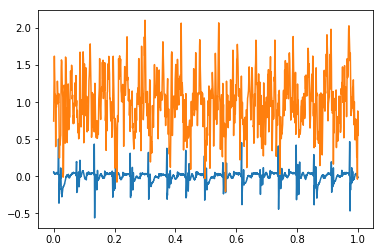

In [8]:
#plt.plot(sm.timestamp, sm.EMG)
plt.plot(sm.sec, sm.EMG)
#plt.show()
plt.plot(sm.sec, sm.len + 1)

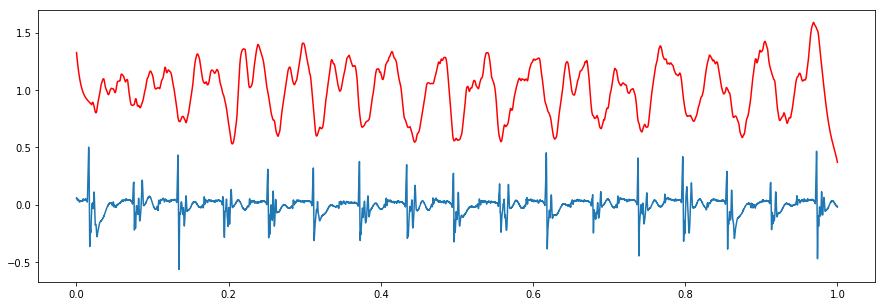

In [29]:
from scipy.signal import savgol_filter
yhat = savgol_filter(sm.len + 1, 1001, 4) # window size 501, polynomial order 3

#plt.plot(sm.sec2,sm.length + 1)
plt.figure(figsize = (15, 5))
plt.plot(sm.sec,yhat, color='red')
plt.plot(sm.sec, sm.EMG)
plt.show()

25001

In [10]:
from FFTUtils import * 

In [11]:
# plot FFT spectrum
spect = FFT(sm.len, log_rate = 25000.0)

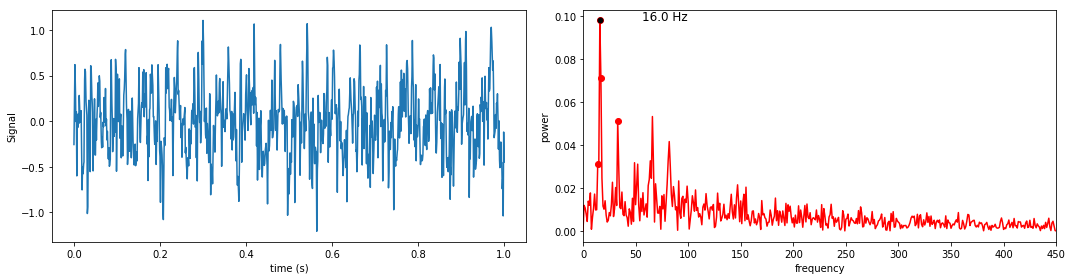

In [12]:
spect.FFT(fmin = 10, fmax = 45)
spect.plotFFT(fmin = 0, fmax =450)

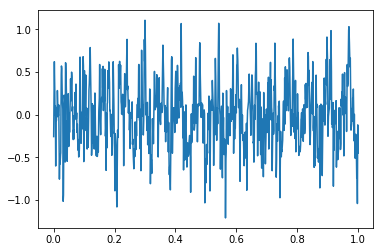

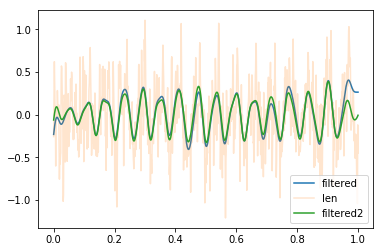

In [93]:
fs = 25000  # Sampling frequency

t = sm.sec #time

fc = 30  # Cut-off frequency of the filter
w = fc / (fs / 2)# Normalize the frequency
sig = sm.len
b, a = signal.butter(6, w, 'low')
output = signal.filtfilt(b, a, sig)
plt.plot(t, sig)
plt.show()
plt.plot(t, output, label='filtered')



# add highpass filter to remove low-req
fc = 10 # Cut-off frequency of the filter
w = fc / (fs / 2)# Normalize the frequency
sig2 = output
b, a = signal.butter(4, w, 'high')
plt.plot(t, sig, alpha = 0.2)
output = signal.filtfilt(b, a, sig2)
plt.plot(t, output, label='filtered2')
plt.legend()



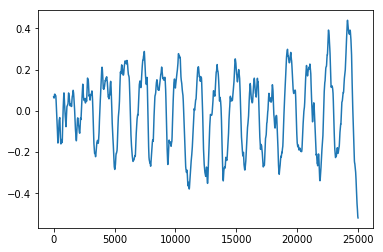

In [100]:
plt.plot(sm["len"].rolling(511, min_periods=1, center = True).mean())

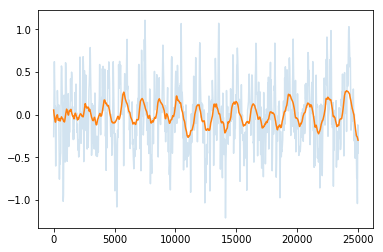

In [105]:
plt.plot(sm["len"], alpha = 0.2)
plt.plot(sm["len"].rolling(901, min_periods=1, center = True).mean())

In [49]:
# plot FFT spectrum
spect = FFT(output, log_rate = 25000.0)
spect.FFT(fmin = 10, fmax = 45)
spect.plotFFT(fmin = 0, fmax =450)

C:\Users\calli\Anaconda3\envs\timeseries_learn_gpu\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\calli\Anaconda3\envs\timeseries_learn_gpu\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

<Figure size 1080x288 with 2 Axes>

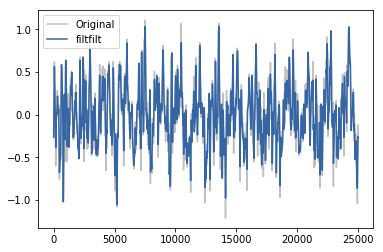

In [33]:
# refref: do a lowpass and a highpass filter to try to remove noise. 
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(3, 0.03, btype="low")
sig = sm.len
sig_ff = signal.filtfilt(b, a, sig)
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.legend(loc="best")


In [17]:
# scale data


In [18]:
comF["ID"] = np.floor(comF.index / 25001).astype(int)

In [19]:
comF.groupby('ID').count()

,len,EMG,sec
ID,,,
0,25001,25001,25001
1,25001,25001,25001
2,25001,25001,25001
3,25001,25001,25001
4,25001,25001,25001
5,25001,25001,25001
6,25001,25001,25001
7,25001,25001,25001
8,25001,25001,25001


In [20]:
comF.head()

,len,EMG,sec,ID
0,-0.255774,0.058332,0.00000,0
1,-0.239091,0.058990,0.00004,0
2,-0.222407,0.059319,0.00008,0
3,-0.205724,0.059319,0.00012,0
4,-0.189040,0.058990,0.00016,0


In [21]:
# split apply combine
grouped = comF.groupby("ID")
grouped

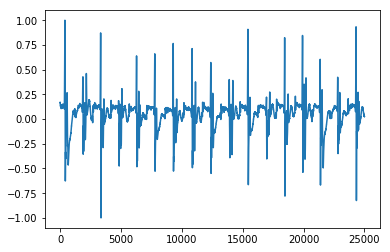

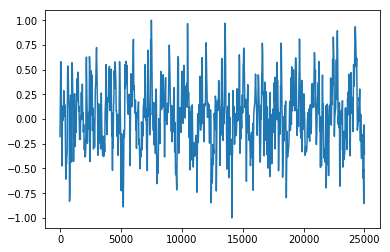

In [22]:
from sklearn.preprocessing import minmax_scale
comF['EMG_scaled'] = comF.groupby('ID').EMG.transform(lambda x: minmax_scale(x.astype(float), feature_range = (-1,1)))
comF['len_scaled'] = comF.groupby('ID').len.transform(lambda x: minmax_scale(x.astype(float), feature_range= (-1,1)))

plt.plot(comF.EMG_scaled[0:25001])
plt.show()
plt.plot(comF.len_scaled[0:25001])

___
# practice with made-up data
# tutorial here: https://www.youtube.com/watch?v=2np77NOdnwk
___

In [23]:

trainX = comF["EMG_scaled"][0:50000]
trainY =  comF["len_scaled"][0:50000]

In [24]:
trainX.shape

(50000,)

In [25]:
# timesteps = np.array(comF.sec2)
# trainX = np.array(comF.length)
# trainY =  np.array(comF.EMG)

# trainX.shape

In [26]:
# reshape data
def reshape_data2(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)
    
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    train2 = result2[:int(row), :]
    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)
    
    x_train = train[:, :-1]
    y_train = train2[:, -1]
    
    x_test = result[int(row):, :-1]
    y_test = result2[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_train, y_train, x_test, y_test]

___
# Fully-connected nnet with windows
___

In [ ]:
# test on made-up data

In [ ]:
timesteps = np.arange(0, 1, 1/25000 )

freq = 25

Y = pd.DataFrame(np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1)
X =  pd.DataFrame((np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.9999)*1 +  
                 np.random.normal(size=len(timesteps))*0.1))
Y.shape

In [ ]:
X_sc = X.copy()
Y_sc = Y.copy()

In [ ]:
split_index=  20000


from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler(feature_range=(-0.5,0.5))
X_sc[:split_index] = scX.fit_transform(X_sc[:split_index])
X_sc[split_index:] = scX.transform(X_sc[split_index:])

scY = MinMaxScaler(feature_range=(-0.5,0.5))
Y_sc[:split_index] = scY.fit_transform(Y_sc[:split_index])
Y_sc[split_index:] = scY.transform(Y_sc[split_index:])


In [ ]:
# add windows
for s in np.arange(1, 2000):
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)


In [ ]:

train_x = X_sc[:split_index].copy()
test_x = X_sc[split_index:].copy()

train_y = Y_sc[:split_index].copy()
test_y = Y_sc[split_index:].copy()

In [ ]:
test_y.head()

In [ ]:
train_y.tail()

In [ ]:
train_x.head()

In [ ]:
train_x.iloc[:, 0] = train_y.iloc[:,0]
#test_x.iloc[:, 0] = test_y.values
train_x.head(15)

In [ ]:
X_train = train_x.dropna().drop(0, axis=1)
y_train = train_x.dropna()[[0]]

X_test = test_x.dropna().drop(0, axis=1)
y_test = test_y.dropna()[[0]]

In [ ]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import keras.backend as K

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mse'])
model.summary()


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1, min_delta =0.0001)

In [ ]:
hist = model.fit(X_train, y_train, epochs=1000, validation_split= 0.1,
          batch_size=2**12, verbose=2,
          callbacks=[early_stop])

In [ ]:
def plot_model_history(model_history, saveFig = False):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),
             model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),
             model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),
                   len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    if saveFig:
        fig.savefig(os.path.join(figDir, "ModelTraining.png"), dpi = 120, bbox_inches='tight')
    plt.show()

In [ ]:
plot_model_history(hist, saveFig = False)

In [ ]:
y_pred = model.predict(X_test)

plt.plot((X_test[:, 0]) + 1)
plt.plot((y_test))
plt.plot((y_pred))

In [ ]:
X_train.shape

In [ ]:
y_pred = model.predict(X_train)

plt.plot(X_train[:, 0] + 2)
plt.plot((y_train))
plt.plot((y_pred))

In [ ]:
X_train.shape

In [ ]:
plt.plot(X_train[:, 0] + 2)
plt.plot(y_train[:, 0])

### Fit LSTM with timeseries data

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 1, -1)
X_test_t = X_test.reshape(X_test.shape[0], 1, -1)

In [ ]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape = (1, X_train_t.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(6, return_sequences = True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics =['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1, min_delta =0.0001)

In [ ]:
hist = model.fit(X_train_t, y_train, epochs=100, validation_split= 0.1,
          batch_size=2**12, verbose=2,
          callbacks=[early_stop])

In [ ]:
plot_model_history(hist, saveFig = False)

In [ ]:
y_pred = model.predict(X_train_t)
plt.figure(figsize = [15,10])
plt.plot(X_train_t[:,0, 0] + 2)
plt.plot((y_train))
plt.plot((y_pred))

In [ ]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_shape=(None, layers[0]),
        units=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units = layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="adam", metrics = ['mse'])
    print("> Compilation Time : ", time.time() - start)
    return model

In [ ]:
model= build_model([1,50,100,1])
earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.01, patience= 5, verbose=1, mode='auto')

In [ ]:
plt.plot(x_train[:, 499, 0])
plt.plot(y_train[:])

In [ ]:
model_info = model.fit(x_train, y_train, batch_size = 2**11, epochs=100, validation_split=0.05, callbacks = [earlystop])

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
plot_model_history(model_info)

In [ ]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [ ]:
predicted = predict_point_by_point(model, x_test)
predicted.shape

In [ ]:
plt.figure(figsize = (10, 4))
x_test.shape
plt.plot(x_test[:, 499, 0], label = "input")
#plt.plot(y_test[], label = "output")
plt.plot(y_test[-x_test.shape[0]:] + 2, label = "y")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)) + 2, label = "prediction")
plt.legend()

In [ ]:
pp = model.predict(x_test)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(pp)

In [ ]:


plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[-len(predicted):].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[-len(predicted):].reset_index(drop = True), label = "actual")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[0:len(predicted)].reset_index(drop = True), label = "actual")
#plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
x_test.shape

In [ ]:
predicted = predict_point_by_point(model, x_train[0:25000,:,:])
predicted.shape

In [ ]:

plt.figure(figsize = (20, 8))
plt.plot(x_train[0:25000, 999, 0])
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)

In [ ]:
def reshape_dataTestONLY(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)

    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)

    x_test = result[:, :-1]
    y_test = result2[:, -1]

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_test, y_test]

In [ ]:
timesteps = np.arange(0, 0.5, 1/25000 )

freq = 25

trainY1 = np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1
trainX1 =  np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.99)*1 + np.random.normal(size=len(timesteps))*0.1
trainY1.shape

In [ ]:
plt.plot(minmax_scale(trainX1[0:12500], (-1,1)))
x_test2, _ = reshape_dataTestONLY(minmax_scale(trainX1[0:12500], (-1,1)), trainY1, 1000)
plt.show()
plt.plot(x_test2[:, 999, 0])

In [ ]:
predicted = predict_point_by_point(model, x_test2)
predicted.shape

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(x_test2[:, 999, 0], label = 'made-up EMG signal')
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
propBreak = 0.9
windowLen = 200

backCt = int(len(trainX) - propBreak * len(trainX) + propBreak * windowLen)
print(backCt)

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,0,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")
#plt.plot(yhat[-81:] -1, label = "smoothed")
plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()
#plt.plot(y_test)
#plt.savefig(os.path.join(figDir, "LSTM_MadeUpData.png"), dpi = 500)


In [ ]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt - windowLen +  1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,windowLen-1,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")

plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()


In [ ]:
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[(-backCt):], label = "data we're trying to predict")

In [ ]:
results = reshape_data(trainX, 50)

In [ ]:
np.random.shuffle(results)
results.shape

shuffInt = np.random.choice(np.arange(0, results.shape[1]), replace=False, size=results.shape[1])
results[:, shuffInt]

In [ ]:
shuffInt = np.random.choice(np.arange(0, result.shape[0]), replace=False, size=result.shape[0])
    train = train[:, shuffInt]